# Computer Vision

In [1]:
import torchvision
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## CV module

In [2]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html#intro

# load image
# http://freewallpaper2010.blogspot.com/2011/12/messi-kick-ball-wallpaper.html
FILENAME = 'messi.jpg'
"""
cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
"""

img = cv2.imread(FILENAME, cv2.IMREAD_COLOR)
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(1000, 1600, 3)
uint8
0
255


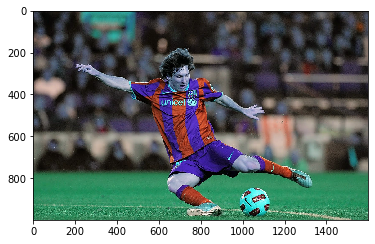

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) # matplotlib uses RGB, cv2 uses BGR

## Color Spaces

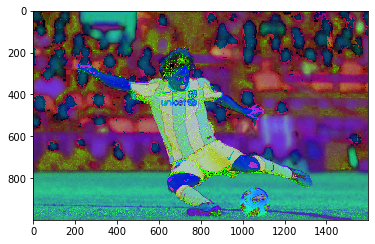

In [4]:
# http://colorizer.org/
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
#plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR))

## Color histogram

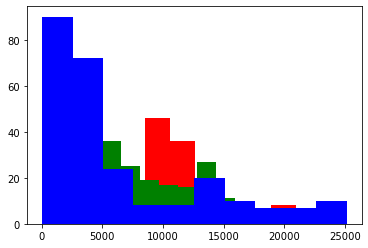

In [5]:
plt_color = ['red', 'green', 'blue']
for i in range(3):
    plt.hist(cv2.calcHist([img_rgb],[i], None, [256], [0,256]), label=str(i), color=plt_color[i])

## Math + Logic  

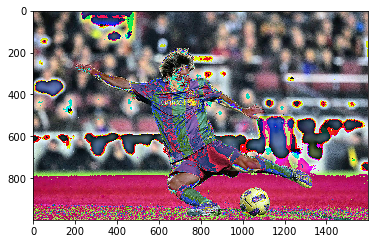

In [6]:
# Operations
plt.imshow(img_rgb*2)
#plt.imshow(img_rgb - img_rgb)

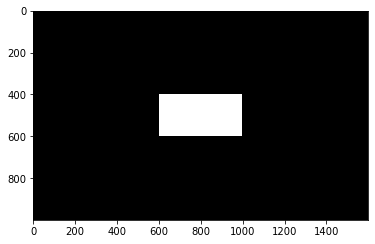

In [7]:
# Bitwise-AND mask and original image
mask = np.zeros((img_rgb.shape[0], img_rgb.shape[1]), dtype=np.uint8)
mask[400:600,600:1000] = 1
plt.imshow(mask, cmap='gray')

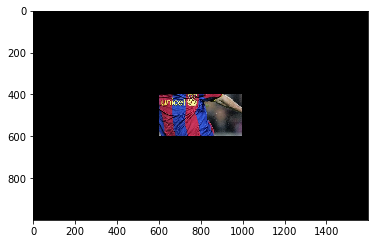

In [8]:
masked_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(masked_img)

## Smoothing images

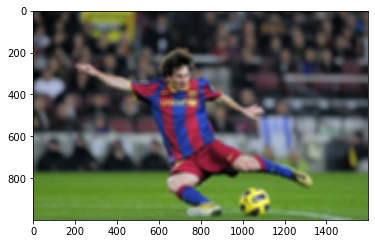

In [9]:
# averaging
plt.imshow( cv2.blur(img_rgb,(21,21)) )

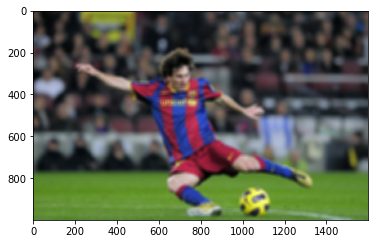

In [10]:
# gaussian filter
plt.imshow( cv2.GaussianBlur(img_rgb,(21,21),10)) # std in both directions

## Sobel + Canny edge detection

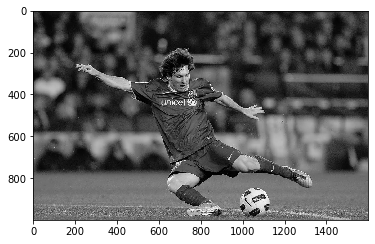

In [11]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

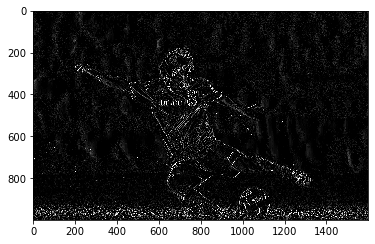

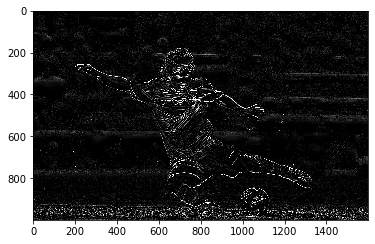

In [12]:
# cv2.CV_8U specify output type
# we are missing negative gradient edges by using unsigned int. Check out tutorial to overcome this limitation
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html

img_sobelx = cv2.Sobel(img_gray, cv2.CV_8U, 1, 0, ksize=3) # first order derivative on first dimension
img_sobely = cv2.Sobel(img_gray, cv2.CV_8U, 0, 1, ksize=3) # first order derivative on second dimension
plt.figure()
plt.imshow(img_sobelx, cmap='gray')
plt.show()
plt.figure()
plt.imshow(img_sobely, cmap='gray')
plt.show()

Why doesn't it identify vertical and horizontal edges? Well, kernel is very small...

(1000, 1600)


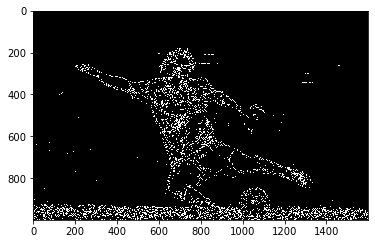

In [13]:
edges = cv2.Canny(img_rgb,100,200) # min and max gradient threshold, keep edges in between
print(edges.shape)
plt.imshow(edges, cmap='gray')

## TorchVision package

In [ ]:
train_mnist = MNIST('.data', download=False, train=True)
train_cifar = CIFAR10('.data', download=False, train=True)

In [ ]:
train_mnist[0]

In [ ]:
print(train_mnist[0][0].mode) # grayscale
train_mnist[0][0].size

In [ ]:
totensor = transforms.ToTensor()
topil = transforms.ToPILImage()

In [ ]:
img = totensor(train_mnist[0][0])
print(img.size())
plt.imshow(img.squeeze(0), cmap='gray') 

In [ ]:
topil(img)

In [ ]:
print(train_cifar[0][0].mode)
train_cifar[0][0].size

In [ ]:
img_cifar = totensor(train_cifar[0][0])
print(img_cifar.size())
#plt.imshow(img_cifar) # error!!!
plt.imshow(img_cifar.permute(1,2,0))

In [ ]:
crop = transforms.CenterCrop(15) # not working on grayscale!

In [ ]:
plt.imshow(totensor(crop(topil(img_cifar))).permute(1,2,0))

In [ ]:
rotate = transforms.RandomRotation(30) # not working on grayscale!

In [ ]:
plt.imshow(totensor(rotate(topil(img_cifar))).permute(1,2,0))